In [255]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset.csv',index_col=0)

In [257]:
import os
import glob

In [258]:
path= '/home/ncp/workspace/data/DL/d1'
d1= os.listdir(path)
# d1

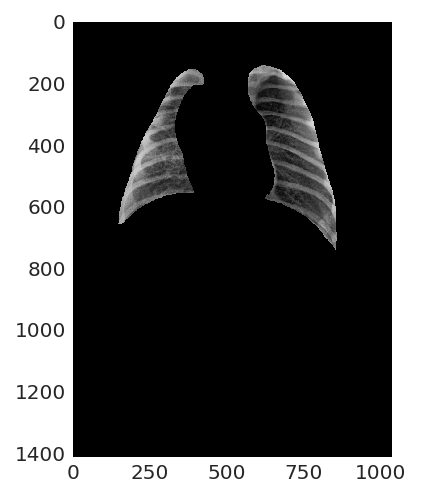

In [259]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1= cv2.imread(path+'/'+d1[0])
plt.imshow(img1)


In [234]:
# img1.shape

In [235]:
# height, width = img1.shape[:2]

In [175]:
img_gray  = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [176]:
_, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
# img_binary = cv2.bitwise_not(img_binary)

In [177]:
contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

In [233]:
# print(contours[0])  #왼
# print(contours[1])  #오

In [179]:
# for i, contour in enumerate(contours):
#     cv2.drawContours(img1, [contour],0,(0,255,0),2)
#     cv2.putText(img1, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
#     print(hierarchy[0][i])
 
# x, y, w, h = cv2.boundingRect(contours[0])
# cv2.rectangle(img1,(x,y),(x+w, y+h),(0,0,255), 1) # red
 
# cv2.imshow('img1', img1)
# # cv2.waitKey()
# # cv2.destroyAllWindows()

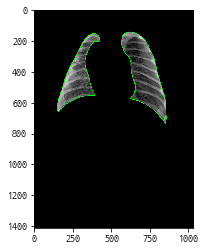

In [180]:
cv2.drawContours(image=img1, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
plt.imshow(img1)


In [181]:
# contours[i] -> contour
for i, contour in enumerate(contours):
#     cv2.drawContours(img1, [contour],0,None,2)    # (0,255,0) 초록색으로 안하고 걍 None 으로 줘서 투명색
#     cnt1 = contours[0]
#     cnt2 = contours[1]
#     cv2.drawContours(img_binary, [cnt1, cnt2], 0, None, 2)
    cv2.drawContours(image=img1, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
#     cv2.putText(img1, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
#     print(count, hierarchy[0][i])
    # cv2.imshow('src',img_src)
    # cv2.waitKey()

In [182]:
# num0 = 0 왼쪽
contours_min_0 = np.argmin(contours[0], axis=0)
contours_max_0 = np.argmax(contours[0], axis=0)

x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

# ---------------------------------------------------------
# num1= 1 오른쪽
contours_min_1 = np.argmin(contours[1], axis=0)
contours_max_1 = np.argmax(contours[1], axis=0)

x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

In [183]:
if y_Min_0 < y_Min_1:  # 왼쪽이 작으면 
    y_Min = y_Min_0    # 왼쪽이 min값 
else :
    y_Min = y_Min_1    #같거나 크면 오른쪽이 min값
    

if y_Max_0 > y_Max_1:  # 왼쪽이 크면 
    y_Max = y_Max_0    # 왼쪽이 max값 
else :
    y_Max = y_Max_1    #같거나 크면 오른쪽이 max값

In [184]:
print("x-Min =", x_Min_0)
print("y-Min =", y_Min)
print("x-Max =", x_Max_1)
print("y-Max =", y_Max)

x-Min = 146
y-Min = 141
x-Max = 855
y-Max = 739


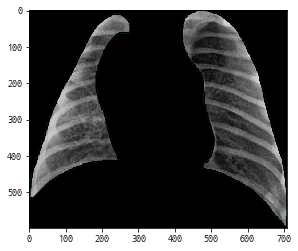

In [185]:
img_trim = img1[y_Min:y_Max, x_Min_0:x_Max_1]
plt.imshow(img_trim)


In [232]:
# print(len(contours))

In [44]:
# centres = []
# for i in range(len(contours)):
#     moments = cv2.moments(contours[i])
#     centres.append((int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])))
#     cv2.circle(img1, centres[-1], 3, (0, 0, 0), -1)

# print(centres)

# plt.imshow(img1)
# cv2.imwrite('output.png',img)
# cv2.waitKey(0)

In [ ]:
# edged = cv2.Canny(img1, 10, 250)
# cv2.imshow('Edged', edged)
# cv2.waitKey(0)

In [7]:
def crop_error(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    contours_min_0 = np.argmin(contours[0], axis=0)
    contours_max_0 = np.argmax(contours[0], axis=0)

    x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
    y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
    x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
    y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)

    img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]
    
    return img_trim

In [119]:

#### 진 짜 코 드 

def crop(path):
    try: 
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

        # --------------------------------------------------------

        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
        
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
        
        img_trim = img[y_Min:y_Max, x_Min:x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

In [280]:

#### 진 짜 코 드  ##

def crop(path):
    try: 
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

        # --------------------------------------------------------

        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
        
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
                
        if x_Min < 0 :
            img_trim =  img[y_Min:y_Max, : x_Max ]
        elif y_Min < 0 :    
            img_trim = img[ :y_Max, x_Min:x_Max]
        elif x_Min < 0  and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(path)
        # gray scale
        img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # threshold
        _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)
        
        if x_Min < 0 :
            img_trim =  img[y_Min:y_Max, : x_Max ]
        elif y_Min < 0 :    
            img_trim = img[ :y_Max, x_Min:x_Max]
        elif x_Min < 0 and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]

#         img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

In [357]:
path = '/home/ncp/workspace/data/crop/d6/H13_01393_02.png'

In [1]:
def Khcode(path):
    #### 진 짜 코 드  ##
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

    try:

        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        # contour[1]의 x,y min,max
        contours_min_1 = np.argmin(contours[1], axis=0)
        contours_max_1 = np.argmax(contours[1], axis=0)

        x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
        y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
        x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
        y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

        # --------------------------------------------------------

        if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
            x_Min = x_Min_0    # x_Min_0이 min값 
        else :
            x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

        if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
            x_Max = x_Max_0    # x_Max_0이 max값 
        else :
            x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

        if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
            y_Min = y_Min_0    # y_Min_0이 min값 
        else :
            y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


        if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
            y_Max = y_Max_0    # y_Max_0이 max값 
        else :
            y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값

        #         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)

        if x_Min < 0 and y_Min > 0 :
            img_trim =  img[y_Min:y_Max, : x_Max ]
        elif y_Min < 0 and x_Min > 0 :    
            img_trim = img[ :y_Max, x_Min:x_Max]
        elif x_Min < 0  and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]
        
        return img_trim

    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)

        #         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        if x_Min < 0 and y_Min > 0 :
            img_trim =  img[y_Min:y_Max, x_Min+10 : x_Max ]
        elif y_Min < 0 and x_Min > 0 :    
            img_trim = img[ y_Min+10:y_Max, x_Min:x_Max]
        elif x_Min < 0  and y_Min < 0 :
            img_trim = img[:y_Max,:x_Max]
        else:
            img_trim = img[y_Min : y_Max, x_Min : x_Max]


        return img_trim 

이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네
이게되네


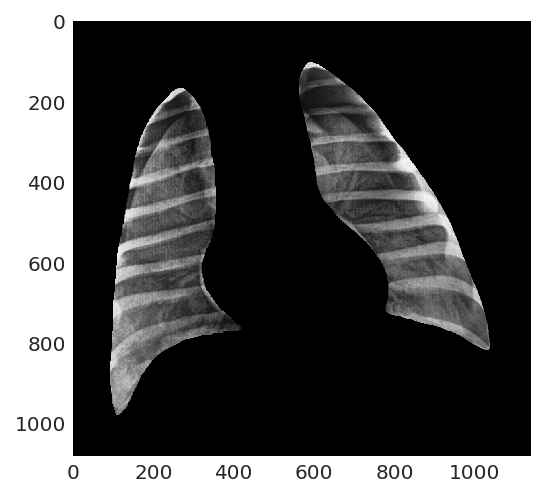

In [388]:
good = []
no = []

for err in error:
    try:
        A = Khcode(err)
        print('이게되네')
        good.append(err)
        plt.imshow(A)
    except Exception as e:
        print('안되네')
        no.append(err)
        
    

In [2]:
# image_path
import os

d1p = '/home/ncp/workspace/data/DL/d1/'
d2p = '/home/ncp/workspace/data/DL/d2/'
d3p = '/home/ncp/workspace/data/DL/d3/'
d4p = '/home/ncp/workspace/data/DL/d4/'
d5p = '/home/ncp/workspace/data/DL/d5/'
d6p = '/home/ncp/workspace/data/DL/d6/'
d0p = '/home/ncp/workspace/data/DL/d0/'

f1 = os.listdir('/home/ncp/workspace/data/DL/d1')
f2 = os.listdir('/home/ncp/workspace/data/DL/d2')
f3 = os.listdir('/home/ncp/workspace/data/DL/d3')
f4 = os.listdir('/home/ncp/workspace/data/DL/d4')
f5 = os.listdir('/home/ncp/workspace/data/DL/d5')
f6 = os.listdir('/home/ncp/workspace/data/DL/d6')
f0 = os.listdir('/home/ncp/workspace/data/DL/d0')

folders = [f1,f2,f3,f4,f5,f6,f0]
fdpath = '/home/ncp/workspace/data/DL/'

img_f1 = []
for name in f1:
    img_f1.append(d1p+name)
    
img_f2 = []
for name in f2:
    img_f2.append(d2p+name)
    
img_f3 = []
for name in f3:
    img_f3.append(d3p+name)
    
img_f4 = []
for name in f4:
    img_f4.append(d4p+name)
    
img_f5 = []
for name in f5:
    img_f5.append(d5p+name)
    
img_f6 = []
for name in f6:
    img_f6.append(d6p+name)
    
img_f0 = []
for name in f0:
    img_f0.append(d0p+name)
    
# print(len(img_f1+img_f2+img_f3+img_f4+img_f5+img_f6+img_f0))
folders = [img_f1,img_f2,img_f3,img_f4,img_f5,img_f6,img_f0]
# len(f1 + f2 + f3 + f4 + f5 + f6 + f0) # f1 -ch f4 // check point rmdir

In [4]:
### 진 짜 코 드 저 장 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

complete = []
error = []


for folder in folders:
    for  img_path in folder:
        try:
            if 'd1' in img_path:
                fdname = 'd1'
            elif 'd2' in img_path:
                fdname = 'd2'
            elif 'd3' in img_path:
                fdname = 'd3'
            elif 'd4' in img_path:
                fdname = 'd4'
            elif 'd5' in img_path:
                fdname = 'd5'
            elif 'd6' in img_path:
                fdname = 'd6'
            elif 'd0' in img_path:
                fdname = 'd0'

            save_fname = img_path.split('DL/')[0]+'crop_2/'+fdname+img_path.split(fdname)[1]
            cropimg = Khcode(img_path)

            plt.imsave(save_fname,cropimg)
            print('[원]',img_path,'        [저장]',save_fname,'        [완료]')
            complete.append(fdname)

        except Exception as e:
            pass
            print('\n',e)
            print(img_path,'      [오류]')
            error.append(img_path)

[원] /home/ncp/workspace/data/DL/d1/H05_00835_02.png         [저장] /home/ncp/workspace/data/crop_2/d1/H05_00835_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H05_00799_01.png         [저장] /home/ncp/workspace/data/crop_2/d1/H05_00799_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H03_00488_01.png         [저장] /home/ncp/workspace/data/crop_2/d1/H03_00488_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H13_00157_01.png         [저장] /home/ncp/workspace/data/crop_2/d1/H13_00157_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H05_00917_02.png         [저장] /home/ncp/workspace/data/crop_2/d1/H05_00917_02.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H01_00056_01.png         [저장] /home/ncp/workspace/data/crop_2/d1/H01_00056_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H08_00549_01.png         [저장] /home/ncp/workspace/data/crop_2/d1/H08_00549_01.png         [완료]
[원] /home/ncp/workspace/data/DL/d1/H03_00490_01.png         [저장] /home/ncp/workspace/data/

In [4]:
# a = crop('/home/ncp/workspace/data/DL/d1/H03_00488_01.png')
# plt.imshow(a)

In [5]:
# plt.imshow(crop('/home/ncp/workspace/data/DL/d4/H03_00329_01.png'))

In [117]:
# plt.imshow(crop('/home/ncp/workspace/data/DL/d4/H03_00329_01.png'))
# plt.show()
# plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H05_00835_02.png'))
# plt.show()

# plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H05_00799_01.png'))
# plt.show()

# plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H03_00488_01.png'))
# plt.show()
